## Fitting models to predict House winners 
* Logistic Regression
* KNN
* Naive Bayes
* Decision Trees
* Random Forest 
* SVM


In [43]:
# check for necessary 
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.cross_validation import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc, log_loss, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
import pickle

from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from scipy import stats
from scipy.stats import (median_test, mannwhitneyu)



from sklearn.feature_selection import chi2

from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import (cross_val_score, cross_val_predict)

from sklearn import preprocessing
%matplotlib inline

from sklearn.externals.six import StringIO
import pydot

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import cross_validation


In [85]:
df = pd.read_pickle('../datafiles/data.p')

In [88]:
df.to_pickle('../datafiles/data.p')

In [19]:
#names of columns containing dollars
money_col = ['itemproxy','unitemproxy','ieproxy','totalind','instate',
         'itemind', 'unitemagainst', 'itemagainst' ,'unitemfor',
         'unitemind', 'totalpacs','itempacs','unitempacs',
         'ieagainst','itemfor', 'iefor' , 'unitemtotal',  
         'itemtotal' ,'total', 'unitemie',  'itemie','ie']

coms =['ecn' ,'tax',  'bus', 'rul', 'sci', 'tra', 'nat' ,'jud',
       'adm' ,'gov' ,'for' ,'ene' ,'edu', 'bud', 'ban' ,'arm',
       'app', 'pri', 'egw', 'lib', 'hsc', 'int', 'way', 'vet', 
       'sta', 'agr']

bio = [ 'congyear' , 'feccandid', 'party', 'candname' , 'winner', 'cpo', 'office', 'state', 'district']
status = ['leader', 'chairman' ,'power', 'leadershipcom', 'leadership']
election = ['close2' , 'close5', 'close10', 'vap',  'generalturnout', 
            'primaryturnout' ,  'primary' , 'primaryperc' ,  'general','generalperc' ]
misc = ['majorityprev', ]

drop = ['seat' , 'acceptpacs', 'cid',  'incumbent', 'open' , 'challenger']

In [36]:
# Regularization: transform dollar amounts to z-values (????? FIXME look it up)
money_df = df[money_col] # pick just the columns containing dollar amounts
min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(money_df)
scaled_df = pd.DataFrame(scaled, columns = money_df.columns)

          
# 'ecn' ,'tax',  'bus', 'rul', 'sci', 'tra', 'nat' ,'jud',
#            'adm' ,'gov' ,'for' ,'ene' ,'edu', 'bud', 'ban' ,'arm',
#            'app', 'pri', 'egw', 'lib', 'hsc', 'int', 'way', 'vet',
#            'sta', 'agr',

In [38]:
# Merging scaled columns with other variables 
# Features 
X = scaled_df.join(df[[ 'congyear', 'party', 'winner', 'c', 'i', 'o',
                       'percunitem']])


# Target variable 
y = df['winner'] 
print "Computed the target vector with %d entries." % len(y)

Computed the target vector with 2256 entries.


In [56]:
X.columns

Index([u'itemproxy', u'unitemproxy', u'ieproxy', u'totalind', u'instate', u'itemind', u'unitemagainst', u'itemagainst', u'unitemfor', u'unitemind', u'totalpacs', u'itempacs', u'unitempacs', u'ieagainst', u'itemfor', u'iefor', u'unitemtotal', u'itemtotal', u'total', u'unitemie', u'itemie', u'ie', u'congyear', u'congyear', u'party', u'winner', u'c', u'i', u'o', u'percunitem'], dtype='object')

# Logistic Regression

In [30]:
# fit the model
log = LogisticRegression(C=.001)
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
model = log.fit(X_train, y_train)
y_pred = model.predict(X_test)


# analyze the results
y_score = model.predict_proba(X_test)
fpr, tpr = roc_curve(y_test, y_score) # false/true positive rates on the test set
roc_auc = auc(fpr, tpr)               # area under the curve
plt.plot(fpr, tpr, label='ROC curve of ' + log + '  (area = {1:0.2f})'.format(log, roc_auc[i]))

# print "classification report"
# print classification_report(y_test, y_pred)
# print "Accuracy Score: %.4f" % round(accuracy_score(y_test, y_pred), 3)
# print "Precision: %.4f" % round(precision_score(y_test, y_pred),3)
# print "Recall: %.4f" % round(recall_score(y_test, y_pred),3)
# print "F1: %.4f" % round(f1_score(y_test, y_pred),3)
# print '   accuracy score             %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='accuracy'))
# print '   precision score            %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='precision'))
# print '   recall score               %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='recall'))
# print '   f1 score                   %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='f1'))
                          


ValueError: bad input shape (677, 2)

### Decision Tree

In [ ]:
scoresTrain = []
scoresTest=[]
for i in range(1, 21):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict(X_train)
    scoresTrain.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    scoresTest.append(accuracy_score(y_test, y_test_pred))
plotdata = pd.DataFrame(data={'Train': scoresTrain, 'Test': scoresTest})
plotdata.index=range(1, 21)
%matplotlib inline
matplotlib.style.use('ggplot')
plotdata.plot()

### Random Forest

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])), features[float(indices[f])]

### KNN

In [31]:
###################################
# Functions
###################################

# Find optimal number of neighbors for KNN
def max_n(X, y, n=20):
   
    X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
    k_list = []
    temp = {}
    for i in range(1, n+1):
        model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        temp[i] = accuracy_score(y_test, model.predict(X_test))
    n = int(max(temp.iteritems(), key=itemgetter(1))[0]) 
    kvalue = float(max(temp.iteritems(), key=itemgetter(1))[1])                 
    
    return n, kvalue


In [48]:
knn.kneighbors(X_test, n_neighbors=1)[1]

array([[1203],
       [ 967],
       [1138],
       [1472],
       [  32],
       [ 276],
       [ 574],
       [ 715],
       [ 651],
       [  53],
       [ 480],
       [ 197],
       [1285],
       [ 270],
       [1371],
       [ 797],
       [1245],
       [1200],
       [ 721],
       [1196],
       [1418],
       [ 515],
       [ 744],
       [ 698],
       [1352],
       [  50],
       [1408],
       [ 720],
       [ 622],
       [1306],
       [ 391],
       [ 940],
       [ 893],
       [ 838],
       [1134],
       [1116],
       [ 348],
       [ 820],
       [ 457],
       [ 964],
       [ 143],
       [ 858],
       [1347],
       [1237],
       [ 525],
       [1081],
       [1337],
       [ 128],
       [ 789],
       [ 291],
       [ 463],
       [1403],
       [ 310],
       [ 767],
       [ 283],
       [ 518],
       [   7],
       [1414],
       [ 335],
       [1092],
       [ 103],
       [ 342],
       [1476],
       [ 916],
       [1179],
       [ 557],
       [15

In [51]:
X_train.ix[1203]

itemproxy           0.000000
unitemproxy         0.000000
ieproxy             0.000000
totalind            0.037513
instate             0.139582
itemind             0.073328
unitemagainst       0.039136
itemagainst         0.091716
unitemfor           0.139893
unitemind           0.009713
totalpacs           0.210190
itempacs            0.179204
unitempacs          0.292402
ieagainst           0.097491
itemfor             0.041930
iefor               0.102135
unitemtotal         0.045329
itemtotal           0.115005
total               0.075687
unitemie            0.065956
itemie              0.023476
ie                  0.053115
congyear         2008.000000
congyear            1.000000
party               2.000000
winner              1.000000
c                   0.000000
i                   1.000000
o                   0.000000
percunitem          0.334070
Name: 1203, dtype: float64

In [54]:
X_test.ix[1788]

itemproxy           0.000000
unitemproxy         0.000000
ieproxy             0.000000
totalind            0.024442
instate             0.090047
itemind             0.052784
unitemagainst       0.000000
itemagainst         0.000000
unitemfor           0.097883
unitemind           0.002568
totalpacs           0.104688
itempacs            0.090040
unitempacs          0.141860
ieagainst           0.000000
itemfor             0.020482
iefor               0.061855
unitemtotal         0.016986
itemtotal           0.068191
total               0.039241
unitemie            0.046149
itemie              0.011467
ie                  0.032167
congyear         2008.000000
congyear            1.000000
party               2.000000
winner              1.000000
c                   0.000000
i                   1.000000
o                   0.000000
percunitem          0.238580
Name: 1788, dtype: float64

In [42]:
knn = KNeighborsClassifier(n_neighbors=2)
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
print "classification report"
print classification_report(y_test, y_pred)
# print "Accuracy Score: %.4f" % round(accuracy_score(y_test, y_pred), 3)
# print "Precision: %.4f" % round(precision_score(y_test, y_pred),3)
# print "Recall: %.4f" % round(recall_score(y_test, y_pred),3)
# print "F1: %.4f" % round(f1_score(y_test, y_pred),3)
print '   accuracy score             %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='accuracy'))
print '   precision score            %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='precision'))
print '   recall score               %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='recall'))
print '   f1 score                   %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='f1'))


classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       313
          1       1.00      1.00      1.00       364

avg / total       1.00      1.00      1.00       677

   accuracy score             0.9493 
   precision score            0.9402 
   recall score               1.0000 
   f1 score                   0.9641 


KNN (n=1) accuracy: 0.9985
KNN (n=2) accuracy: 0.9985
KNN (n=3) accuracy: 0.9985
KNN (n=4) accuracy: 0.9956
KNN (n=5) accuracy: 0.9970
KNN (n=6) accuracy: 0.9956
KNN (n=7) accuracy: 0.9941
KNN (n=8) accuracy: 0.9941
KNN (n=9) accuracy: 0.9941
KNN (n=10) accuracy: 0.9941
KNN (n=11) accuracy: 0.9911
KNN (n=12) accuracy: 0.9926
KNN (n=13) accuracy: 0.9926
KNN (n=14) accuracy: 0.9926
KNN (n=15) accuracy: 0.9926
KNN (n=16) accuracy: 0.9911
KNN (n=17) accuracy: 0.9897
KNN (n=18) accuracy: 0.9911
KNN (n=19) accuracy: 0.9897
KNN max accuracy: 0.9985


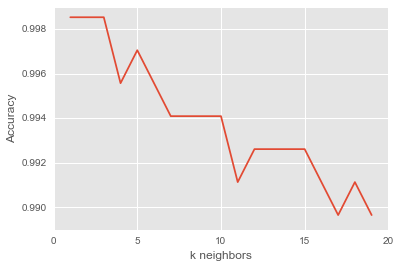

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
accs = []
for n in range(1,20):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    Y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, Y_test_pred)
    accs.append(accuracy)
    print 'KNN (n=%i) accuracy: %.4f' % (n,accuracy)

print 'KNN max accuracy: %.4f' % max(accs)
plt.plot(range(1,20), accs)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

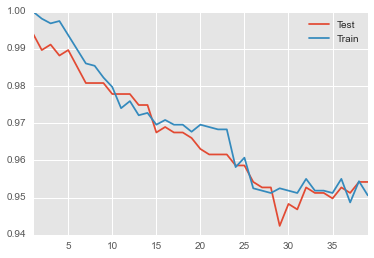

In [33]:
scoresTrain = []
scoresTest=[]
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict(X_train)
    scoresTrain.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    scoresTest.append(accuracy_score(y_test, y_test_pred))
    
plotdata = pd.DataFrame(data={'Train': scoresTrain, 'Test': scoresTest})
plotdata.index=range(1, plotdata.shape[0] + 1)
plotdata

%matplotlib inline
plt.style.use('ggplot')
plotdata.plot()

# Evaluation Metrics

In [113]:


# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)

# ###

# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
# classifier = GradientBoostingClassifier()
# target_names = ['Winner', 'Loser']
# classifier.fit(X_train, y_train)
# print model.__name__
# print classification_report(y_test, fit.predict(X_test), target_names=target_names)

###
models = {'log': LogisticRegression(),
          'rf': RandomForestClassifier(),
          'knn': KNeighborsClassifier(n_neighbors=kbest),
          'linsvc': LinearSVC(),
          'tree': DecisionTreeClassifier(),
          'gnb': GaussianNB(),
          'mnb': MultinomialNB(),
          'gbc' : GradientBoostingClassifier()
         }





# pred_probs = {}
# scores = {}
# preds = {}
# for mname, m in models.iteritems():
X = StandardScaler().fit_transform(X)
# X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)

#     print "*** %s" % mname
#     m.fit(X_train, y_train)
#     if mname != 'linsvc':
#         pred_probs[mname] = {'train': m.predict_proba(X_train),  'test': m.predict_proba(X_test)}
#     pred = m.predict(X_test)
#     preds[mname] = pred
#     prec, recall, fscore, sup = precision_recall_fscore_support(y_test, pred)
#     scores[mname] = {'accuracy': accuracy_score(y_test, pred),
#                      'precision': prec,
#                      'recall': recall,
#                      'fscore': fscore}
# pprint(scores)

# for mname, y_pred in preds.iteritems():
#     cm = confusion_matrix(y_test, y_pred)
#     cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
#     ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
#     plt.yticks(rotation=0) 
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.title("%s confusion matrix, %s" %(mname, topic))
#     sns.plt.show()

### coefs

def get_scores_coef(X, y):
    # X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
    for mname, m in model_dict.iteritems():

        coefs = sorted(zip(m.coef_[0], X_train.columns))
        for coef in coefs:
            print '%.05f \t%s' % (coef)
        all_preds[mname] = preds
        all_proba[mname] = proba
        return coefs

,Accuracy,F1,Model,Precision,Recall
0,0.588,0.735,LogisticRegression,0.591,0.972
1,0.922,0.933,RandomForestClassifier,0.937,0.930
2,0.535,0.591,KNeighborsClassifier,0.611,0.573
3,0.563,0.719,SVC,0.578,0.950
4,0.910,0.923,DecisionTreeClassifier,0.922,0.925
5,0.753,0.749,GaussianNB,0.933,0.626
6,0.923,0.935,GradientBoostingClassifier,0.926,0.945


# 1 MVP Approach: Just predict the winners, regardless of race
1. Try all classifiers, optimizing when necessary 
2. Evaluate using all metrics 
    -roc curve, all thresholds 
    -percision, accuracy, etc. 
    -knn
        -number of ks
    -log
        -logloss
## Decisions:


In [69]:
# n_samples = X_train.shape[0]
log = LogisticRegression()
# cv = cross_validation.ShuffleSplit(n_samples, n_iter=10, test_size=0.25, random_state=1)
# log.fit(X_t)
# scores = cross_validation.cross_val_score(log, X_train, y_train.ravel(), cv=cv)
y = df['winner']
X = df[['total' , 'incumbent', 'party', 'congyear']]

y_pred_proba = cross_validation.cross_val_predict(log, X, y, cv=10)
# fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba[:,1])
# roc_rates = [fpr, tpr]
# auc = sklearn.metrics.auc(fpr, tpr)
# plt.title("Logistic Regression", fontsize = 20)
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# labelname = "Logistic Regression" + ", (area = %0.3f)" % auc
# plt.plot(roc_rates[0], roc_rates[1], linewidth = 2, label = labelname)
# plt.legend(loc = 4)

0.65417738169095463

In [ ]:
def get_score(model = model(), X=X, y=y, cv=5):
    mod = model
    scores = cross_validation.cross_val_score(
        mod, X, y, cv=cv)
    return scores 



# 2 Pick winner based on opponent, whomever has the greater probability

# 3 Train as pairs, take into account opponent characterists 
### Append opponent data to candidate variables ?

# Exploratory Graphs
scatter marked winner/loser
-small/large
-crosstables 

In [67]:
xtab = pd.crosstab(np.array(df['cpo']), np.array(df['winner']), rownames=['cpo'], colnames=['outcome'])[:-1]

# Graphical Evaluation

### Confusion Matrices

In [ ]:
n_samples = X_train.shape[0]
log = LogisticRegression()
cv = cross_validation.ShuffleSplit(n_samples, n_iter=10, test_size=0.3, random_state=1)
scores = cross_validation.cross_val_score(log, X_train, y_train.ravel(), cv=cv)
# print scores.mean()
log.fit(X_train, y_train.ravel())
print "Accuracy Score: %f" % log.score(X_test, y_test.ravel())

log.fit(X_train, y_train.ravel())
y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labelname = log.classes_
sns.heatmap(cm, annot=True,  fmt='', xticklabels=labelname, yticklabels=labelname)

###
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
# X = df[['incumbent', 'open', 'challenger', 'percunitem', 'congyear', 'total_sc', 'party', 'primaryperc',
#         'close2', 'close5', 'close10', 'leader', 'chairman', 'majorityprev', 'vap', 'adm', 'agr', 'app', 'arm', 'ban', 'bud', 
#              'bus', 'ecn', 'edu', 'egw', 
#              'ene', 'for', 'gov', 'hsc', 'int', 'jud',
#              'lib', 'nat', 'pri', 'rul', 'sci', 'sta',
# #              'tax', 'tra', 'vet', 'way', 'ieagainst', 'ieproxy', 'percpacs', 'ie', 'percind']]
# X = df[['ieagainst']]
# y = df['winner']

labels = ['Winner', "Loser"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = GradientBoostingClassifier()
y_pred = classifier.fit(X, y).predict(X)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y))
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
fig = plt.figure()
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)
cax = ax.matshow(cm)
plot_confusion_matrix(cm)


# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
plt.savefig('temp.png', transparent=True)

###
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print


labels = ["1", "2", "3", "4"]
cm = confusion_matrix(y_pred, y, labels)


print_cm(cm, labels)

###
for mname, y_pred in preds.iteritems():
    cm = confusion_matrix(y_test, y_pred)
    cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
    ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
    plt.yticks(rotation=0) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("%s confusion matrix, %s" %(mname, topic))
    sns.plt.show()


### Whatever this is

In [ ]:
X = pd.get_dummies(df['cpo']).join(df[['party', 'congyear', 'unitemtotal', 'total', 'total_sc']])
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
log = LogisticRegression().fit(X_train, y_train)
y_pred_proba = log.predict_proba(X_test)
fpr, tpr, _ = roc_curve(ç)
roc_rates = [fpr, tpr]
auc = auc(fpr, tpr)
plt.title("Logistic Regression", fontsize = 20)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
labelname = "Logistic Regression" + ", (area = %0.3f)" % auc
plt.plot(roc_rates[0], roc_rates[1], linewidth = 2, label = labelname)
plt.legend(loc = 4)
log_loss(y_test, y_pred_proba[:,1])

### ROC

In [ ]:
#WRONG
sns.set_style("white")
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111) 
m = GradientBoostingClassifier()
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.set_xlabel('False Positive Rate', fontsize=15)
plt.plot(fpr, tpr, color = '#9ecae1')
plt.plot([0, 1], [0, 1], color = '#08306b', linestyle = '--')
plt.show()
plt.savefig('demo.png', transparent=True)

###
estimators = [
    LogisticRegression(), 
    SVC(probability=True), 
    GaussianNB(), 
    DecisionTreeClassifier(max_depth = 5), 
    RandomForestClassifier(), 
    KNeighborsClassifier(n_neighbors = 10)
    ]

names = ["Logistic Regression", "Support Vector Machine", "Gaussian Naive Bayes", "Decision Tree Classifier",
        "Random Forest Classifier", "K Neighbors - 10"]

colors = ["b", "g", "r", "k", "c", "y"]

def roc_rates(estimator, X_train = X_train, y_train = y_train.ravel(), X_test = X_test, y_test = y_test.ravel()):
    
    #Recursive Features Selection
    model = estimator
    model.fit(X_train, y_train)
    test_pred = model.predict_proba(X_test)
    
    # return the roc parameters
    fpr, tpr, _ = metrics.roc_curve(y_test, test_pred[:,1])
    roc_rates = [fpr, tpr]
    auc = metrics.auc(fpr, tpr)
    return roc_rates, auc

#plt.figure(figsize = (15,12))

for i, model in enumerate(estimators):
    #plt.subplot(2,3, i)
    #plt.title(names[i], fontsize = 20)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
    # plot parameters using unscaled predictors
    params = roc_rates(estimators[i], X_train, y_train.ravel(), X_test, y_test.ravel())[0]
    area = roc_rates(estimators[i], X_train, y_train.ravel(), X_test, y_test.ravel())[1]
    labelname = names[i] + ", (area = %0.2f)" % area
    plt.plot(params[0], params[1], colors[i] + "--", linewidth = 2, label = labelname)
    plt.legend(loc = 4)

plt.tight_layout()
plt.show()

# Calculate log_loss
for i, estimator in enumerate(estimators):
    model = estimator
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict_proba(X_test)
    ll = metrics.log_loss(y_test.ravel(), y_pred[:,1])
    print names[i] + ', LogLoss: %0.2f'% ll

In [ ]:
# # models = [LogisticRegression, RandomForestClassifier, KNeighborsClassifier,
# #           SVC, DecisionTreeClassifier, GaussianNB, GradientBoostingClassifier]

# if algo == KNeighborsClassifier:
#     accs = []
#     for n in range(1,50):
#     model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, Y_pred)
#     accs.append({n:accuracy})

# Predicting 1-0: Logistic, Naive Bayes, SVM, decision trees
# Predicting proba: Log, SVM(prob=True)

In [ ]:
def get_coefs():
    zip( X_train.columns, [round(x, 3) for x in model.coef_[0]])
    coefs = sorted(zip(model.coef_[0], X_train.columns))
    for coef in coefs:
        print '%.05f \t%s' % (coef)


In [ ]:
# Compares ROC of different algorithms 

def compute_ROC_rate(X, y):
    X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.3, random_state=42)
    
    #Recursive Features Selection
    log = LogisticRegression(C=.001)
    log.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)
    
    # return the roc parameters
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
    roc_rates = [fpr, tpr]
    auc = metrics.auc(fpr, tpr)
    return roc_rates, auc

#plt.figure(figsize = (15,12))

for i, model in enumerate(log):
    #plt.subplot(2,3, i)
    #plt.title(names[i], fontsize = 20)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
    # plot parameters using unscaled predictors
    params = roc_rates(log[i], X_train, y_train, X_test, y_test)
    area = roc_rates(log[i], X_train, y_train,, X_test, y_test.ravel)
    labelname = names[i] + ", (area = %0.2f)" % area
    plt.plot(params[0], params[1], colors[i] + "--", linewidth = 2, label = labelname)
    plt.legend(loc = 4)

plt.tight_layout()
plt.show()


In [ ]:
# Choosing penalty for logistic regression
c = [.0001, .001, .01, .1, 1, 10, 100]
for penalty in c:
    log = LogisticRegression(C = penalty)
    print '\n'
    print penalty
    print '-'*20
    print
    print '   accuracy score             %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='accuracy'))
    print '   precision score            %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='precision'))
    print '   recall score               %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='recall'))
    print '   f1 score                   %.4f ' % np.mean(cross_val_score(log, X,y, cv=10, scoring='f1'))